Stock Market Prediction Using ML (LinearRegression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [2]:
stock = pd.read_csv(r'..\Data\RELIANCE.NS.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1996,15.859429,15.944529,15.754989,15.917452,10.509538,48051995
1,02/01/1996,15.878770,15.956133,15.677626,15.793671,10.427812,77875009
2,03/01/1996,16.052837,16.783918,15.878770,15.913584,10.506985,96602936
3,04/01/1996,15.762726,15.813012,15.553845,15.766594,10.409933,100099436
4,05/01/1996,15.704703,15.704703,15.522900,15.658285,10.338421,76935930


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6449 entries, 0 to 6448
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6449 non-null   object 
 1   Open       6449 non-null   float64
 2   High       6449 non-null   float64
 3   Low        6449 non-null   float64
 4   Close      6449 non-null   float64
 5   Adj Close  6449 non-null   float64
 6   Volume     6449 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 352.8+ KB


In [4]:
stock['Date'] = pd.to_datetime(stock['Date'])

C:\Users\pradi\AppData\Local\Temp\ipykernel_27508\688752022.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [5]:
print(f"Dataframe contains stock prices between {stock.Date.min()} {stock.Date.max()}.")
print(f"Total days = {(stock.Date.max() - stock.Date.min()).days} days.")

Dataframe contains stock prices between 1996-01-01 00:00:00 2021-12-08 00:00:00.
Total days = 9473 days.


In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6449.000000,6449.000000,6449.000000,6449.000000,6449.000000,6.449000e+03
mean,441.298504,446.875951,435.192860,440.780180,421.472961,3.028354e+07
std,500.671056,506.392594,494.152908,499.918352,499.179484,4.948439e+07
min,11.836550,11.890704,11.763055,11.890704,7.850869,0.000000e+00
25%,49.674828,50.812065,48.893459,49.643883,39.402367,7.064261e+06
50%,389.235443,394.411377,383.366058,388.542023,360.367401,1.329640e+07
75%,521.308533,527.896057,514.745728,520.392212,486.505341,3.258822e+07
max,2325.000000,2369.350098,2310.550049,2324.550049,2317.096191,6.686620e+08


<AxesSubplot: >

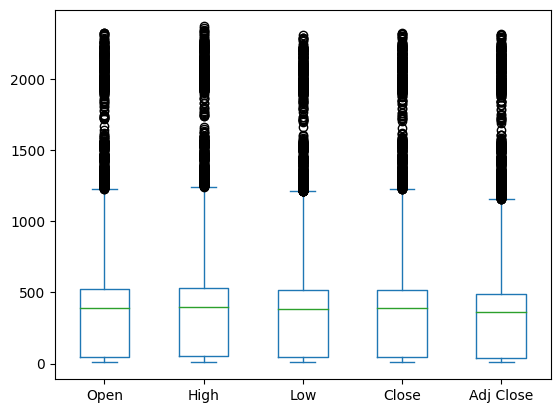

In [7]:
stock[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
#setting the layout for our plot
layout = go.Layout(
    title= "Stock Price of Tesla",
    xaxis=dict(
        title ='Date',
        titlefont = dict(
            family="Courier New, monospace",
            size=18,
            color='#7f7f7f',
        )
    ),
    yaxis=dict(
        title = 'Price',
        titlefont = dict(
            family = "Courier New, monospace",
            size = 18,
            color= '#7f7f7f'
        )
    )
)

maruti_date = [{'x':stock['Date'], 'y':stock['Close']}]
plot = go.Figure(data =maruti_date, layout=layout)

In [9]:
iplot(plot)

In [10]:
#bulding the regresstion model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evolution
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score


In [11]:
X = np.array(stock.index).reshape(-1,1)
Y = stock['Close']
X_train,x_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101) 

In [12]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [15]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
maruti_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = maruti_data,layout=layout)

In [16]:
iplot(plot2)

In [17]:
#Calculate score for model evalution
score = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(x_test))}
'''

print(score)


Metric           Train                Test        
r2_score  0.680014765090098	0.6730269785272673
MSE       81369.5033041927	78305.83587908777

